In [21]:
import sklearn
sklearn.__version__
# 0.22.2.post1
import mglearn
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [4]:
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer

cancer=load_breast_cancer()
X_train,X_test,y_train,y_test=train_test_split(cancer.data, cancer.target,random_state=0)
scaler=MinMaxScaler().fit(X_train)

In [5]:
X_train_scaled=scaler.transform(X_train)

svm=SVC()
svm.fit(X_train_scaled,y_train)
X_test_scaled=scaler.transform(X_test)

In [7]:
svm.score(X_test_scaled,y_test)

0.972027972027972

6.2 파이프라인 구축하기

In [8]:
from sklearn.pipeline import Pipeline
pipe=Pipeline([("scaler",MinMaxScaler()),("svm",SVC())])

In [9]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('svm', SVC())])

In [10]:
pipe.score(X_test,y_test)

0.972027972027972

6.3 그리드 서치에 파이프라인 적용하기

In [11]:
param_grid={'svm__C':[0.001,0.01,0.1,1,10,100],
           'svm__gamma':[0.001,0.01,0.1,1,10,100]}

In [13]:
grid=GridSearchCV(pipe,param_grid=param_grid,cv=5)
grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('svm', SVC())]),
             param_grid={'svm__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'svm__gamma': [0.001, 0.01, 0.1, 1, 10, 100]})

In [14]:
grid.best_score_

0.9812311901504789

In [15]:
grid.score(X_test,y_test)

0.972027972027972

In [17]:
grid.best_params_

{'svm__C': 1, 'svm__gamma': 1}

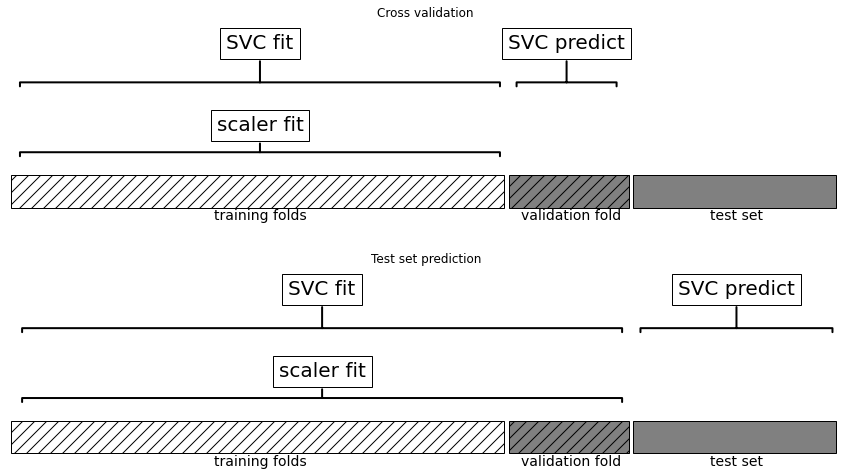

In [19]:
mglearn.plots.plot_proper_processing()

In [22]:
rnd=np.random.RandomState(seed=0)
X=rnd.normal(size=(100,10000))
y=rnd.normal(size=(100,))

In [24]:
from sklearn.feature_selection import SelectPercentile, f_regression

select=SelectPercentile(score_func=f_regression,percentile=5).fit(X,y)
X_selected=select.transform(X)
X_selected.shape

(100, 500)

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge

In [26]:
np.mean(cross_val_score(Ridge(),X_selected,y,cv=5))

0.9057953065239822

In [27]:
pipe=Pipeline([("select",SelectPercentile(score_func=f_regression,percentile=5)),
              ("ridge",Ridge())])
np.mean(cross_val_score(pipe,X,y,cv=5))

-0.2465542238495281

6.4 파이프라인 인터페이스

In [28]:
def fit(self,X,y):
    X_transformed = X
    for name,estimator in self.steps[:-1]:
        X_transformed=estimator.fit_transform(X_transformed,y)
    self.steps[-1][1].fit(X_transformed,y)
    return self

In [29]:
def predict(self,X):
    X_transformed=X
    for step in self.steps[:-1]:
        X_transformed=step[1].transform(X_transformed)
    return self.steps[-1][1].predict(X_transformed)

6.4.1 make_pipeline을 사용하여 파이프라인 생성

In [30]:
from sklearn.pipeline import make_pipeline
pipe_long=Pipeline([("scaler",MinMaxScaler()),("svm",SVC(C=100))])
pipe_short=make_pipeline(MinMaxScaler(),SVC(C=100))

In [31]:
pipe_short.steps

[('minmaxscaler', MinMaxScaler()), ('svc', SVC(C=100))]

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [33]:
pipe=make_pipeline(StandardScaler(),PCA(n_components=2),StandardScaler())
pipe.steps

[('standardscaler-1', StandardScaler()),
 ('pca', PCA(n_components=2)),
 ('standardscaler-2', StandardScaler())]

6.4.2 단계 속성에 접근하기

In [34]:
pipe.fit(cancer.data)
components=pipe.named_steps["pca"].components_
components.shape

(2, 30)

6.4.3 그리드 서치 안의 파이프라인 속성에 접근하기

In [35]:
from sklearn.linear_model import LogisticRegression
pipe=make_pipeline(StandardScaler(),LogisticRegression(max_iter=1000))

In [36]:
param_grid={'logisticregression__C':[0.01,0.1,1,10,100]}

In [37]:
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,random_state=4)
grid=GridSearchCV(pipe,param_grid,cv=5)
grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=1000))]),
             param_grid={'logisticregression__C': [0.01, 0.1, 1, 10, 100]})

In [38]:
grid.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(C=1, max_iter=1000))])

In [39]:
grid.best_estimator_.named_steps["logisticregression"]

LogisticRegression(C=1, max_iter=1000)

In [40]:
grid.best_estimator_.named_steps["logisticregression"].coef_

array([[-0.43570655, -0.34266946, -0.40809443, -0.5344574 , -0.14971847,
         0.61034122, -0.72634347, -0.78538827,  0.03886087,  0.27497198,
        -1.29780109,  0.04926005, -0.67336941, -0.93447426, -0.13939555,
         0.45032641, -0.13009864, -0.10144273,  0.43432027,  0.71596578,
        -1.09068862, -1.09463976, -0.85183755, -1.06406198, -0.74316099,
         0.07252425, -0.82323903, -0.65321239, -0.64379499, -0.42026013]])